## Testing Articulos-v1.1

In [1]:
%load_ext autoreload
%autoreload 2
import json

with open("../../dumps/coronavirus-argentina-v1.1.json") as f:
    arts = json.load(f)
    

In [2]:
arts[0].keys()

dict_keys(['_id', 'tweet_id', 'text', 'slug', 'title', 'url', 'user', 'body', 'created_at', 'comments'])

In [15]:
tw_ids = set([art["tweet_id"] for art in arts])

In [16]:
len(tw_ids)

34021

In [3]:
arts[0]["comments"][0].keys()

dict_keys(['tweet_id', 'text', 'user_id', 'created_at', 'hateful_value'])

In [4]:
len(arts)

34021

In [5]:
arts[0]["tweet_id"]

1250373508330332160

In [8]:
from collections import Counter

counter = Counter(art["user"] for art in arts)

counter

Counter({'perfilcom': 3114,
         'clarincom': 10423,
         'LANACION': 6515,
         'infobae': 8517,
         'cronica': 5452})

In [12]:
from datetime import datetime

dates = [datetime.strptime(art["created_at"]["$date"], '%Y-%m-%dT%H:%M:%SZ') for art in arts]

In [13]:
dates[0]

datetime.datetime(2020, 4, 15, 10, 40, 49)

Text(53.875, 0.5, '#artículos')

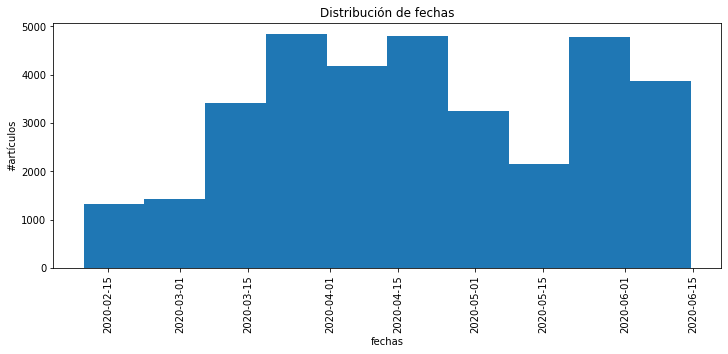

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(dates)
plt.xticks(rotation=90)
plt.title("Distribución de fechas")
plt.xlabel("fechas")

plt.savefig("distr-fechas.png")
plt.tight_layout(pad=1.0)
plt.ylabel("#artículos")

## Artículos que "perdimos"

In [7]:
with open("../../dumps/coronavirus-argentina-v1.json") as f:
    old_arts = json.load(f)

In [12]:
from collections import Counter

old_counter = Counter(art["user"] for art in old_arts)

old_counter - counter

Counter({'perfilcom': 47,
         'clarincom': 199,
         'LANACION': 103,
         'cronica': 67,
         'infobae': 3422})

In [24]:
old_counter

Counter({'perfilcom': 3161,
         'clarincom': 10622,
         'LANACION': 6618,
         'cronica': 5519,
         'infobae': 11939})

Perdimos muchas de infobae! busquemos estas..

In [31]:
infobae_missing_arts = [
    art["tweet_id"] for art in old_arts if art["user"] == "infobae" and art["tweet_id"] not in tw_ids
]

In [32]:
len(infobae_missing_arts)

3441

Vamos a recuperar los datos actualmente en la BBDD porque los viejos datos tienen mal el cuerpo

In [50]:
from mongoengine import connect
from tweepyrate import create_apps
from hatespeech_models import Tweet, Article

client = connect("hatespeech-news")

db = client["hatespeech-news"]

missing_arts = Article.objects(tweet_id__in=infobae_missing_arts).order_by("created_at")

missing_arts.count()

3441

Pongo la conclusión acá (y borro el output): está bien! Sacó muchos artículos basura

In [ ]:
for i, art in enumerate(missing_arts):
    print("="*80)
    print(art.created_at)
    print(f"{i+1} -- {art}")
    
    print(art.body[:200])
